In [80]:
import mat73
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from IPython.display import display
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd 
import json
from os import walk
import seaborn as sns
from pathlib import Path

In [2]:
def read_json(file_name):
    with open(file_name) as f:
      data = json.load(f)
    return data

In [3]:
f = './results'
_, _, filenames = next(walk('./results'))
filenames

['within_42_logistic100.json',
 '.DS_Store',
 'within_42_logistic50.json',
 'leaveone_with_bad_logistic1000.json',
 'leaveone_with_bad_logistic50.json',
 'within_42_logistic0.1.json',
 'within_42_logistic1000.json',
 'leaveone_with_bad_logistic100.json',
 'leaveone_with_bad_logistic01.json']

In [26]:
df = read_json("./results/"+filenames[3])

In [27]:
df.keys()

dict_keys(['name', 'avg_acc', 'coefs'])

In [28]:
arr = np.array(df['coefs'])

In [81]:
"""
input: folder, coefs_np_arr
change to abs value 
store only 0 and 1 to adjust 
store avg of all people to avg 
plot 
store sorted and top 20 to json file 
"""
def write_to_json(file_name,avg_acc,coefs):
    data = {} 
    data['top_20'] = avg_acc
    data['sorted'] = coefs
    with open(file_name, 'w') as outfile:
        json.dump(data, outfile)
def store_graph_sorted_results(folder,arr,threhold=0.0001):
    Path(folder).mkdir(parents=True, exist_ok=True)
    folder += "/"
    arr = np.absolute(arr)
    adjust = arr >= threhold
    adjust = adjust.astype(int)
    adjust = np.sum(adjust,axis=0)
    x = [i for i in range(adjust.shape[1])]
    
    avg = np.average(arr,axis=0)

    plt.bar(x, adjust[0])
    plt.xlabel('2048 features')
    plt.ylabel('count of 0s or 1s of all people')
    plt.savefig(folder+"count.png")
    plt.close()

    plt.bar(x, avg[0])
    plt.xlabel('2048 features')
    plt.ylabel('coef of average of all people')
    plt.savefig(folder+"results.png")
    plt.close()
    
    temp = [] 
    for i in range(len(x)):
        temp.append([x[i],avg[0][i]])
    temp.sort(key=lambda x:x[1],reverse=True)
    write_to_json(folder+"sorted_results.json",temp[:20],temp)

In [39]:
# arr = np.reshape(arr,(arr.shape[0],arr.shape[2]))
arr.shape
arr = np.absolute(arr)

In [40]:
# x = [i for i in range(arr.shape[1])]
# plt.bar(x,arr[0])

In [66]:
adjust = arr >= 0.0001
adjust = adjust.astype(int)
print(np.unique(adjust))
print(adjust.shape)
adjust = np.sum(adjust,axis=0)
print(adjust.shape)
x = [i for i in range(adjust.shape[1])]



# for i in range(arr.shape[0]):
#     temp = np.count_nonzero(arr[i] < 0.00001)
#     print(temp)


[0 1]
(42, 1, 2048)
(1, 2048)


In [67]:

# print(adjust.tolist())
# plt.bar(x,adjust[0])

In [68]:
avg = np.average(arr,axis=0)
avg.shape

(1, 2048)

In [74]:
plt.bar(x, adjust[0])
plt.xlabel('2048 features')
plt.ylabel('count of 0s or 1s of all people')
plt.savefig("out.png")
plt.close()

plt.bar(x, avg[0])
plt.xlabel('2048 features')
plt.ylabel('coef of average of all people')
plt.savefig("out1.png")
plt.close()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


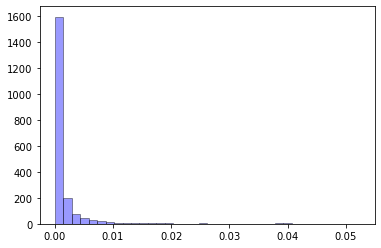

In [55]:
sns.distplot(avg[0], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

In [79]:
temp = [] 
for i in range(len(x)):
    temp.append([x[i],avg[0][i]])
temp.sort(key=lambda x:x[1],reverse=True)
temp[:20]

[[804, 0.05230801212036928],
 [806, 0.04605059854948604],
 [662, 0.04322432418538339],
 [807, 0.040164131369087946],
 [660, 0.039941619581343846],
 [658, 0.03963139554326239],
 [664, 0.03931243475420074],
 [805, 0.03897537758500393],
 [808, 0.038173616013959986],
 [408, 0.038145492282789205],
 [1908, 0.036638182785688804],
 [665, 0.03542696591015031],
 [803, 0.03513725681835987],
 [659, 0.034309891789396856],
 [802, 0.03421213441927609],
 [932, 0.033325867369515205],
 [663, 0.03281488623392152],
 [1909, 0.030802915120865394],
 [1108, 0.030007527912089653],
 [661, 0.028365983402905547]]